In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product 
import scipy.stats as ss 
import seaborn as sns

# Importing and inspecting the data
cas = pd.read_csv(r"dft-road-casualty-statistics-casualty-2019.csv" , low_memory=False)

# Checking the shape and first few rows of the dataset
print(cas.shape)
cas.head()

(153158, 19)


,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,2019010128300,2019,010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2,-1
1,2019010128300,2019,010128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5,-1
2,2019010128300,2019,010128300,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5,-1
3,2019010152270,2019,010152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3,-1
4,2019010155191,2019,010155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1,-1


In [2]:
# Checking columns and data types
num_cols = [cols for cols in cas.columns if cas[cols].dtype!='O']
text_cols = [cols for cols in cas.columns if cas[cols].dtype=='O']

# Dropping unnecessary columns for analysis
cas = cas.drop(['accident_year' , 'accident_index'] , axis=1)
cas = cas[cas['age_of_casualty'] >= 0]  # Removing negative age values
cas = cas[cas['bus_or_coach_passenger'] != 9]
cas = cas[cas['pedestrian_location'] != 10]
cas = cas[cas['car_passenger'] != 9]
cas = cas.drop(['lsoa_of_casualty'], axis=1)
cas = cas[cas['casualty_imd_decile'] != -1]

In [3]:
# Data cleaning for missing values
missing_data_columns = [cols for cols in cas.columns if cas[cols].isnull().sum() >= 1]
for cols in missing_data_columns:
    cas = cas[cas[cols] != -1]

In [4]:
# Further cleaning and handling outliers
high = cas['age_of_casualty'].quantile(0.75) + 2 * cas['age_of_casualty'].std()
cas = cas[cas['age_of_casualty'] <= high]
cas = cas[cas['age_of_casualty'] >= 0]

In [5]:
# Removing rows with frequency less than a specified threshold
threshold = 30
for cols in cas.columns:
    if cols != 'accident_reference':
        val_c = cas[cols].value_counts()
        to_remove = val_c[val_c <= threshold].index
        cas[cols].replace(to_remove, np.nan, inplace=True)
cas = cas.dropna()

# Creating separate dataframes for numerical and categorical columns
df1 = cas[['accident_reference', 'age_of_casualty']]
df2 = cas.drop(['age_of_casualty', 'accident_reference'], axis=1)

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\1720275044.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df2, palette='viridis')


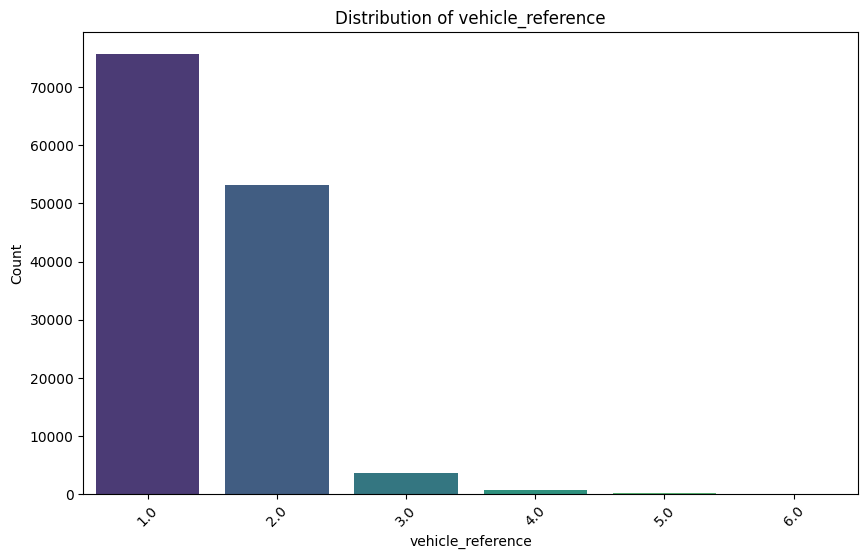

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\1720275044.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df2, palette='viridis')


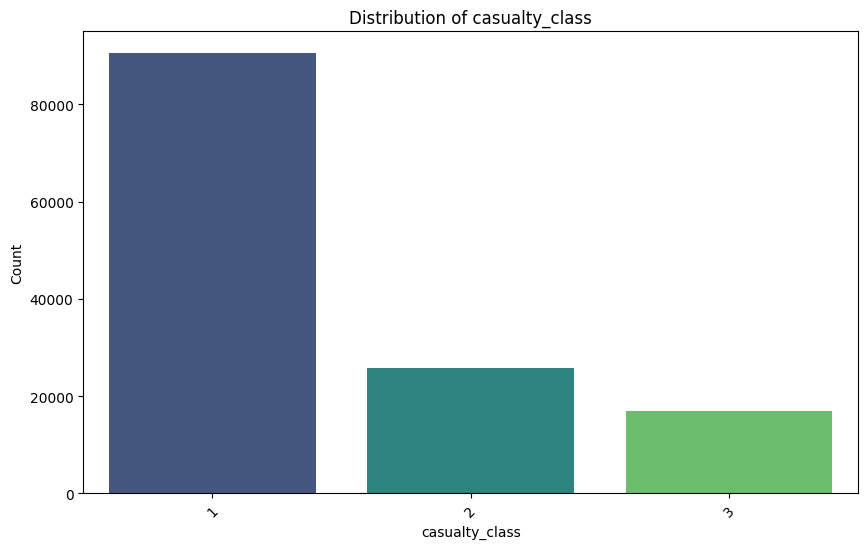

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\1720275044.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df2, palette='viridis')


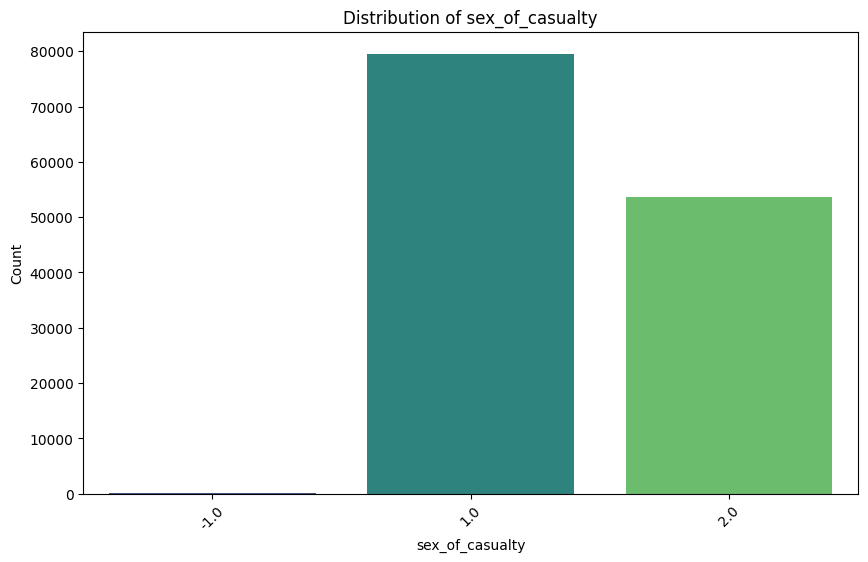

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\1720275044.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df2, palette='viridis')


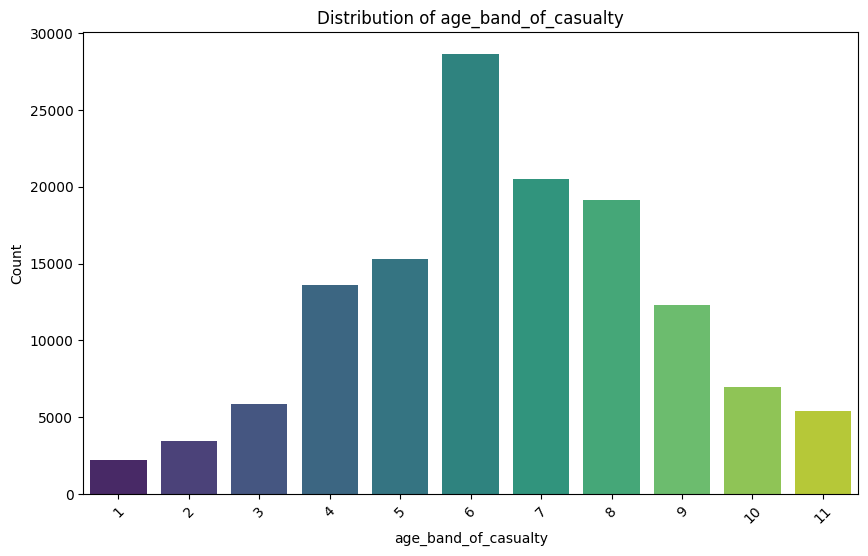

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\1720275044.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df2, palette='viridis')


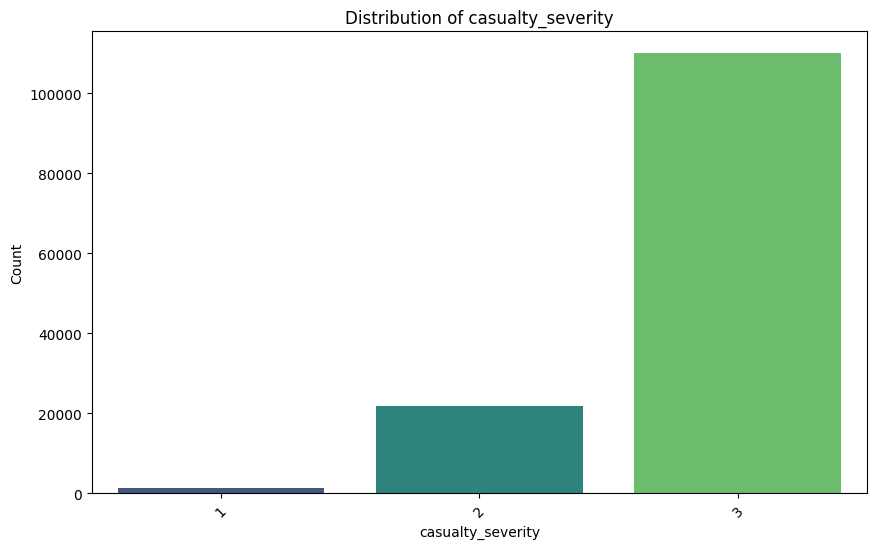

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\1720275044.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df2, palette='viridis')


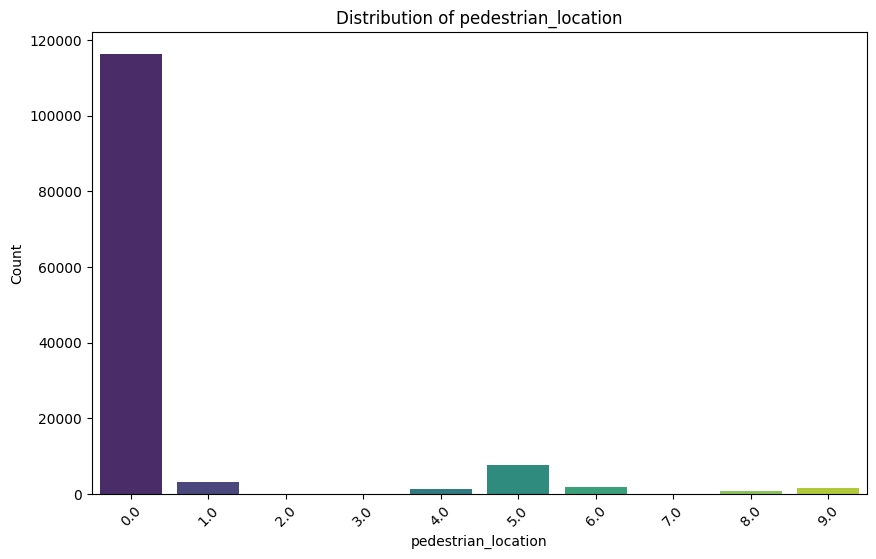

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\1720275044.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df2, palette='viridis')


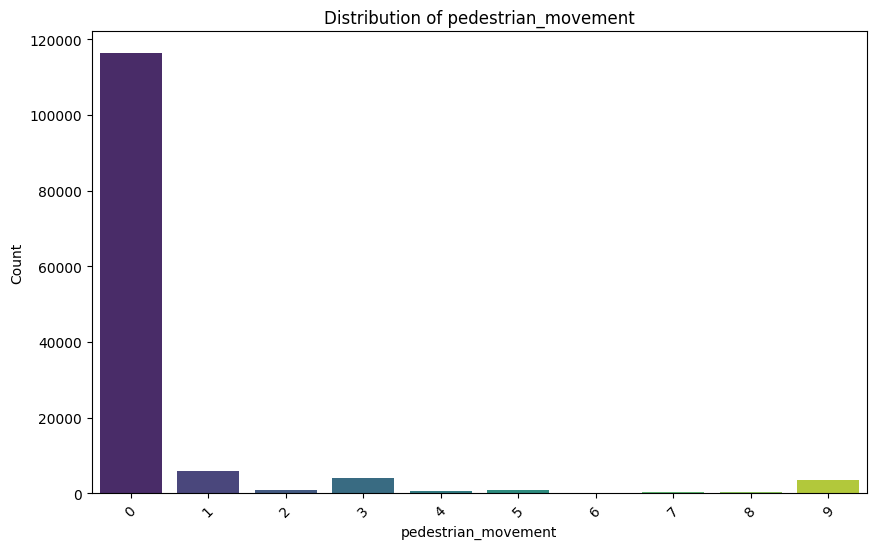

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\1720275044.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df2, palette='viridis')


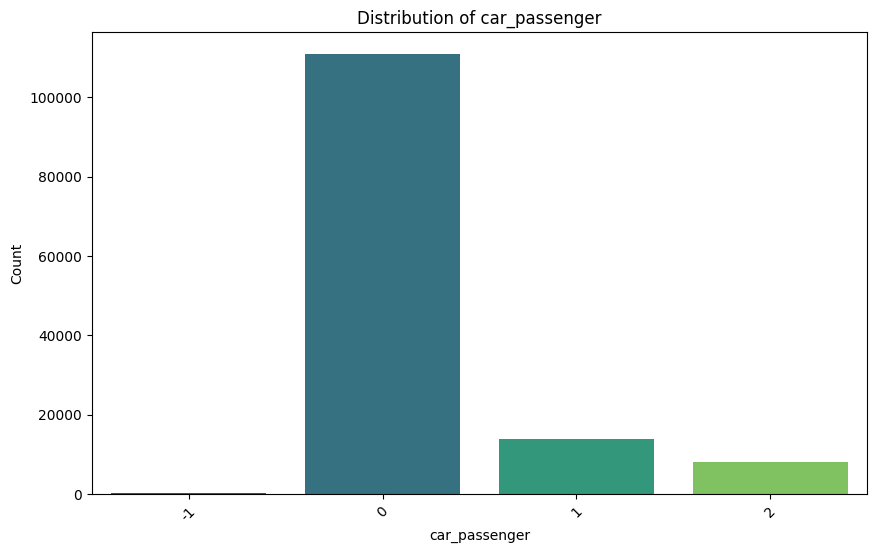

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\1720275044.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df2, palette='viridis')


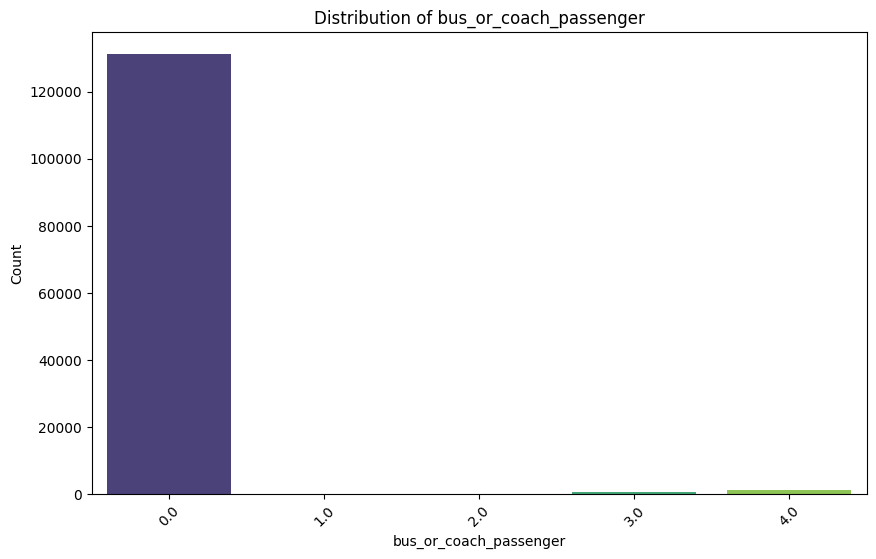

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\1720275044.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df2, palette='viridis')


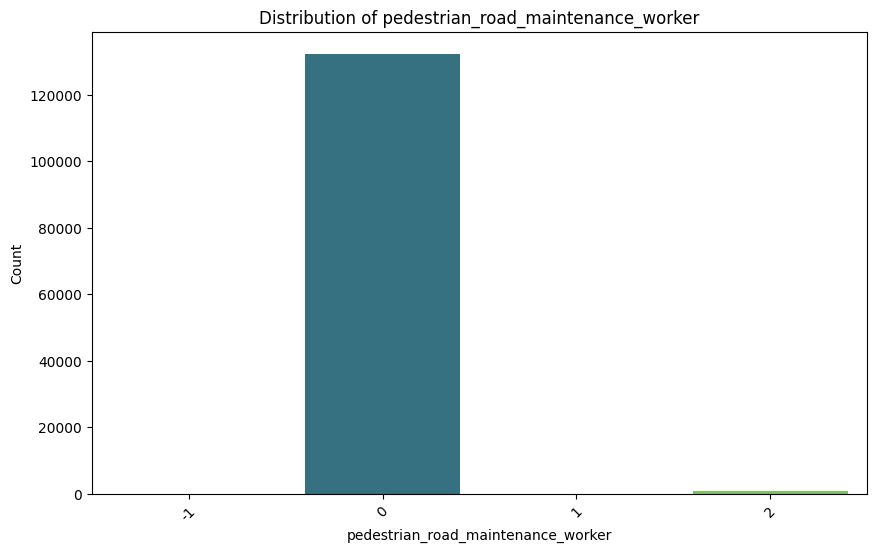

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\1720275044.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df2, palette='viridis')


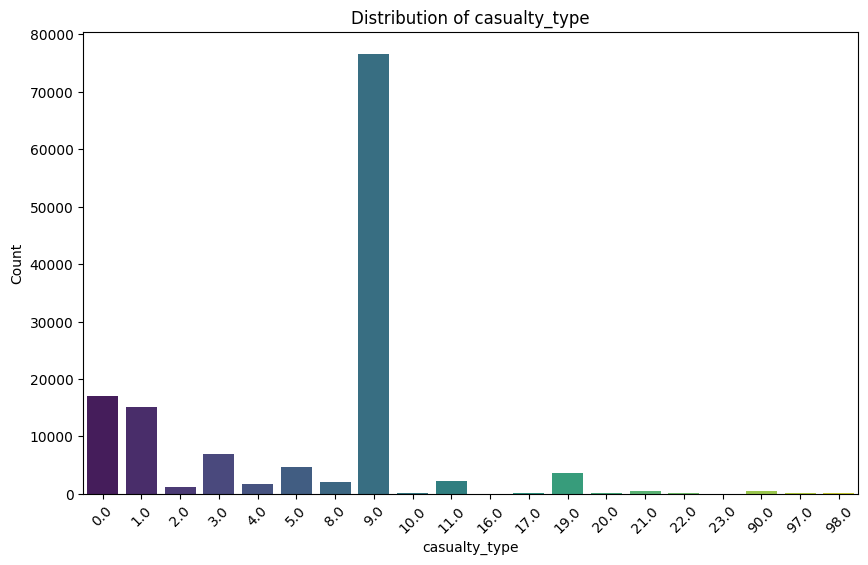

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\1720275044.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df2, palette='viridis')


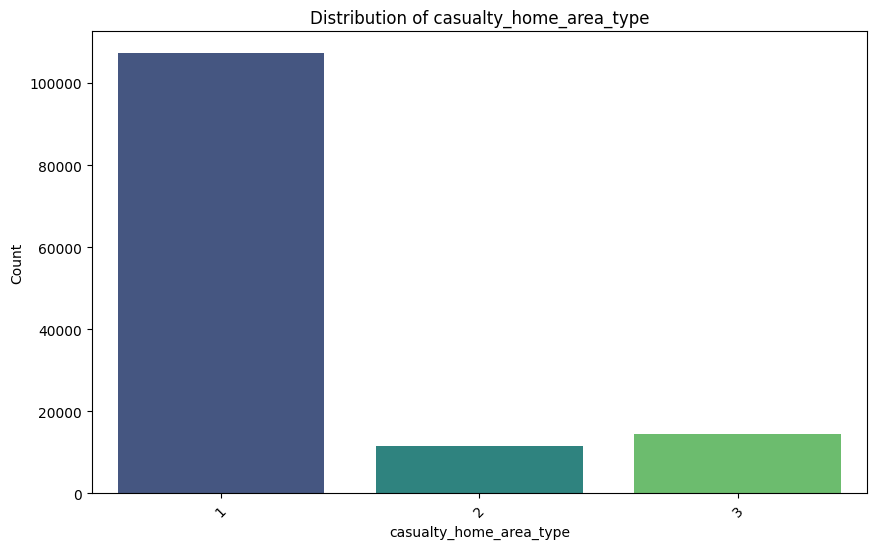

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\1720275044.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df2, palette='viridis')


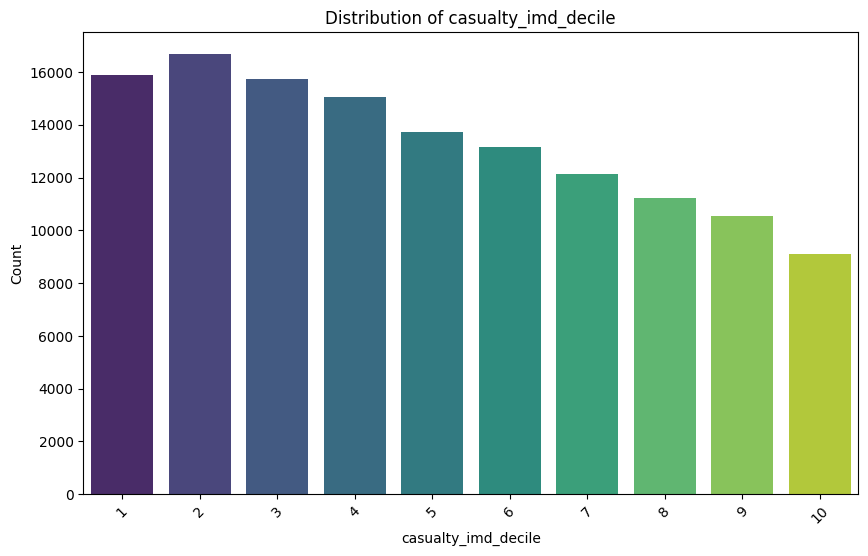

In [6]:
# Visualizing the distribution of numerical data using histograms
for feature in df2.columns:
    if feature != 'casualty_reference':
        plt.figure(figsize=(10, 6))
        sns.countplot(x=feature, data=df2, palette='viridis')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

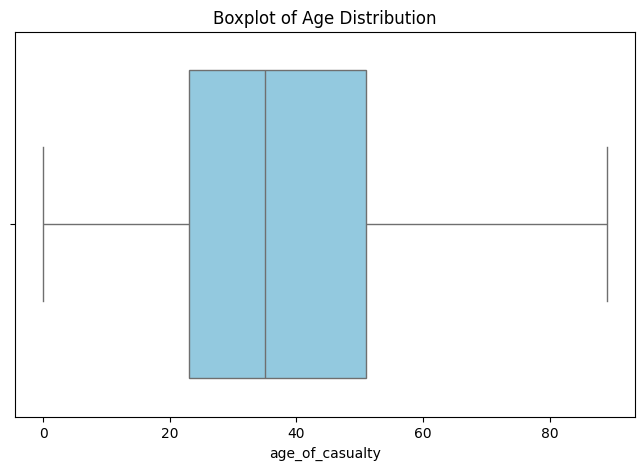

In [7]:
# Box plot for age distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x=df1['age_of_casualty'], color='skyblue')
plt.title('Boxplot of Age Distribution')
plt.show()

In [8]:
# Removing outliers from the age_of_casualty column
high = df1['age_of_casualty'].quantile(0.75) + 2 * df1['age_of_casualty'].std()
df1 = df1[df1['age_of_casualty'] <= high]
df1 = df1[df1['age_of_casualty'] >= 0]

# Concatenating the cleaned numerical and categorical dataframes
final_data = pd.concat([df2, df1], axis=1, join='inner')


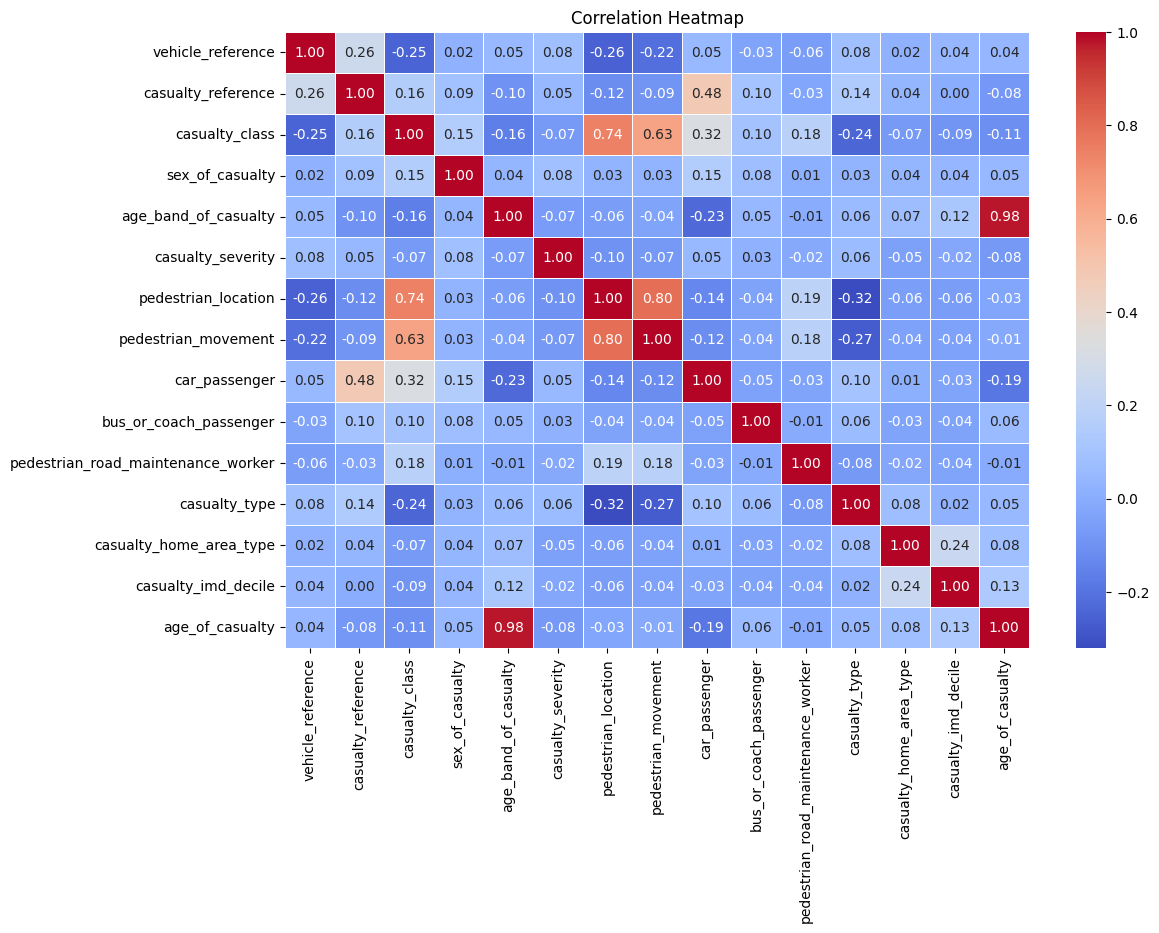

In [17]:
# Correlation Analysis
numeric_columns = final_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = final_data[numeric_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()



# Exploratory Data Analysis (EDA) - Detailed Analysis

# EDA for Type 1 (Fatal) Casualties

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2917885022.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='pastel')


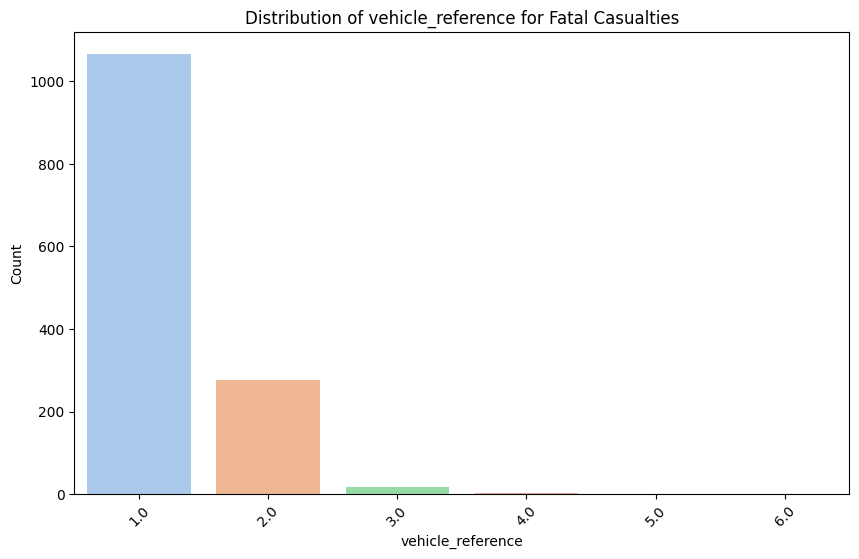

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2917885022.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='pastel')


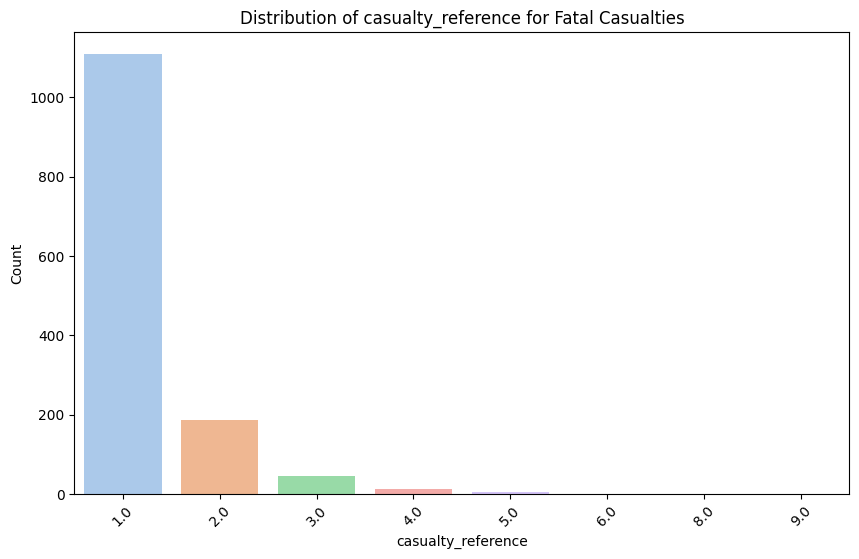

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2917885022.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='pastel')


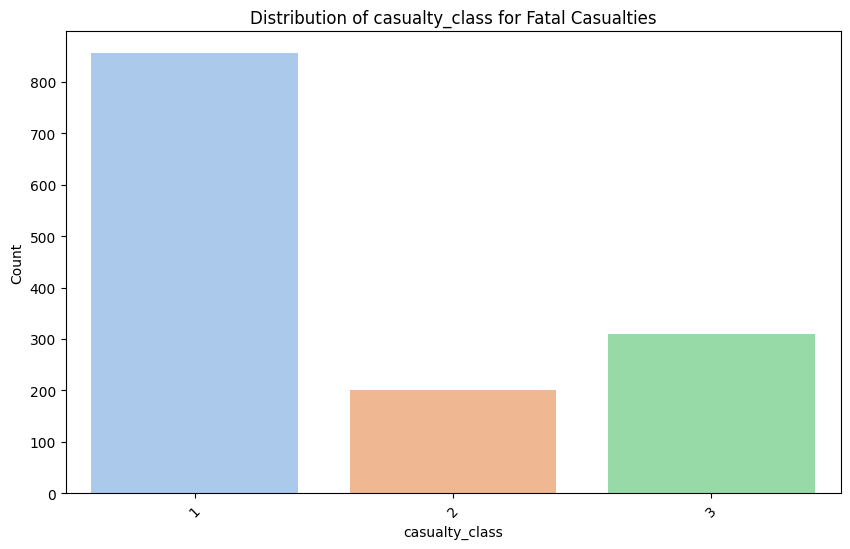

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2917885022.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='pastel')


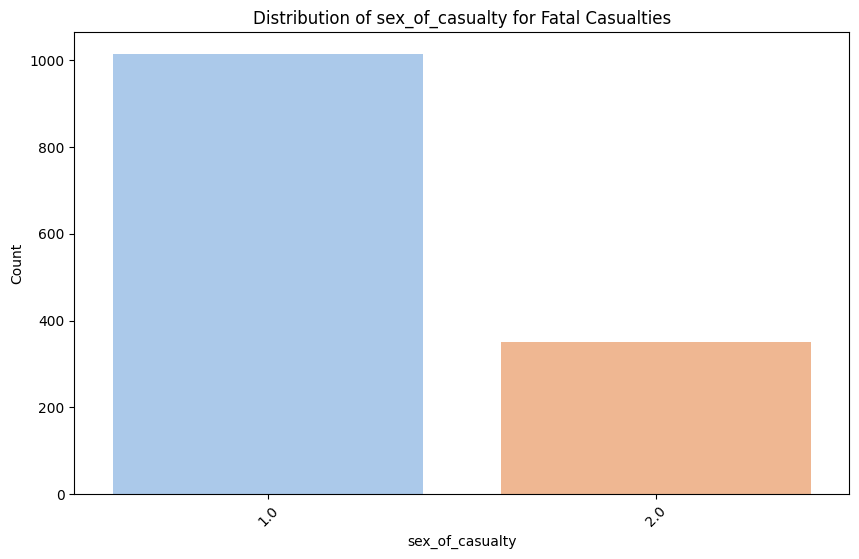

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2917885022.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='pastel')


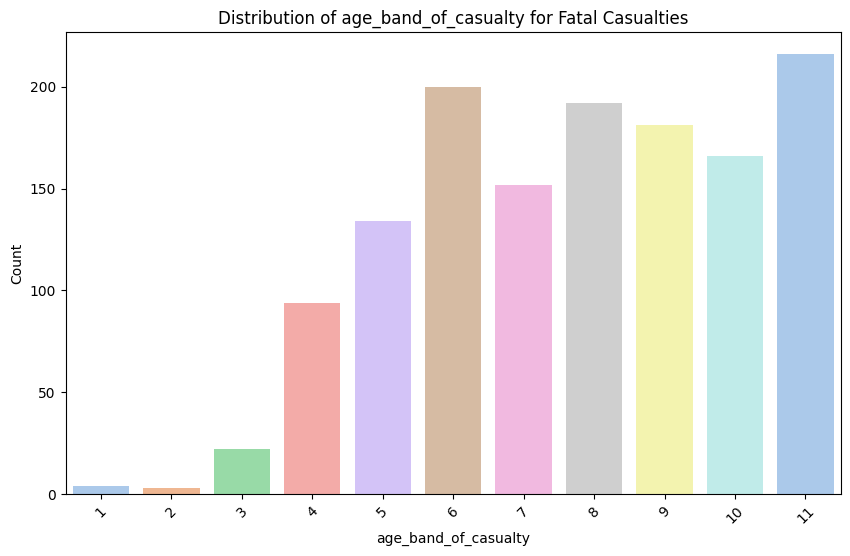

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2917885022.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='pastel')


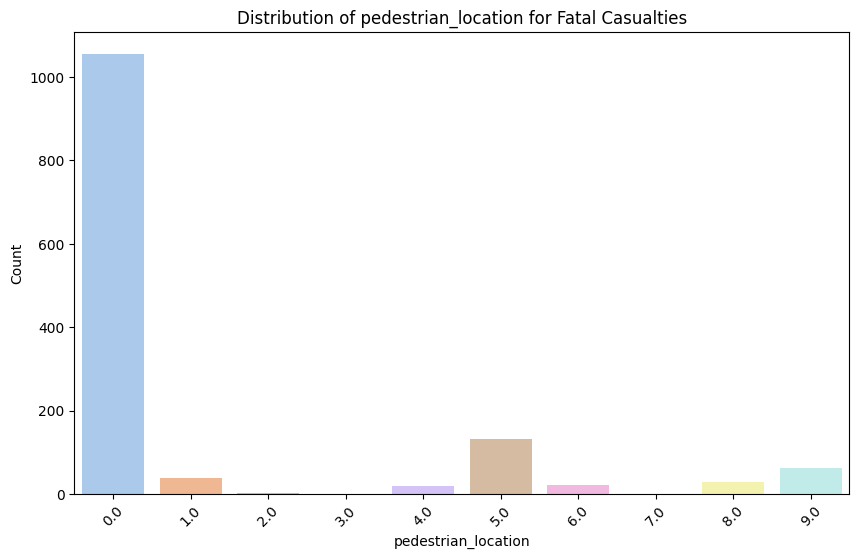

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2917885022.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='pastel')


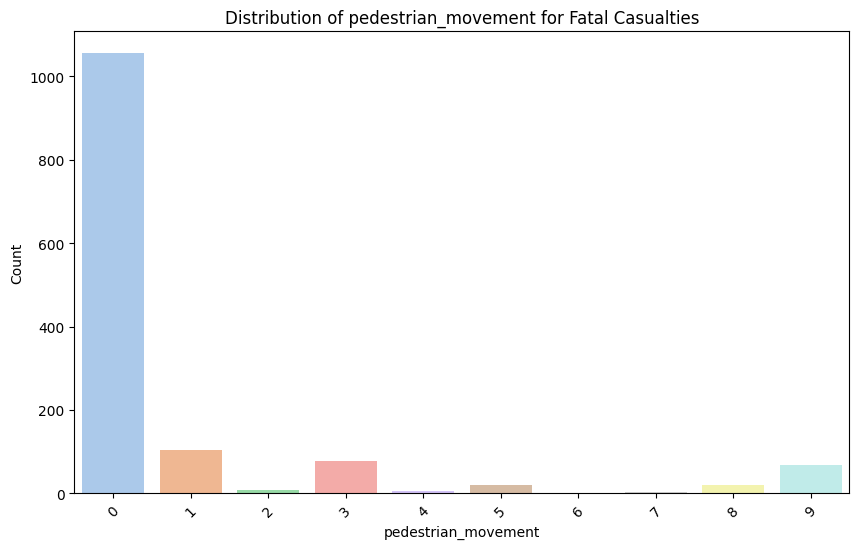

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2917885022.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='pastel')


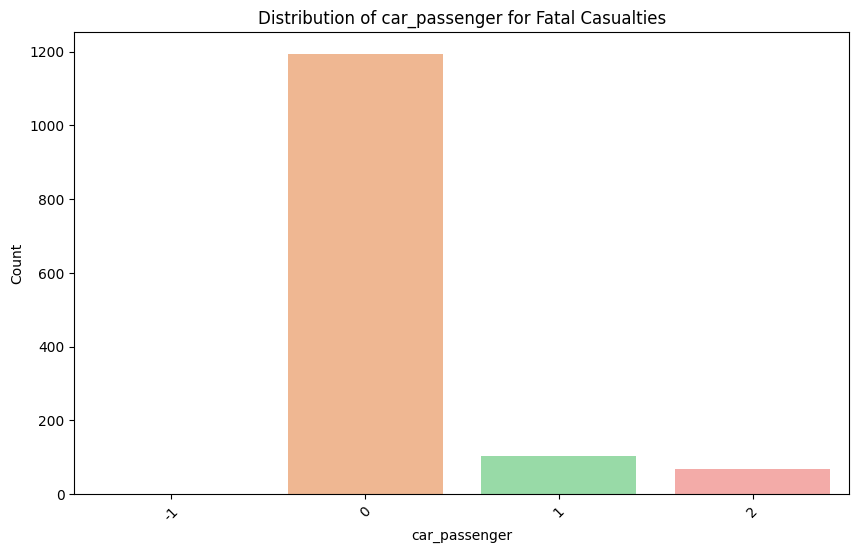

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2917885022.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='pastel')


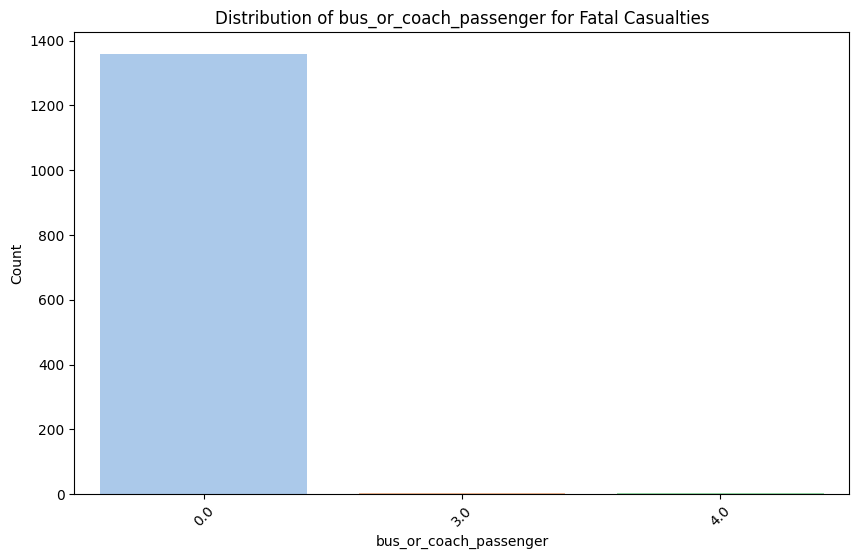

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2917885022.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='pastel')


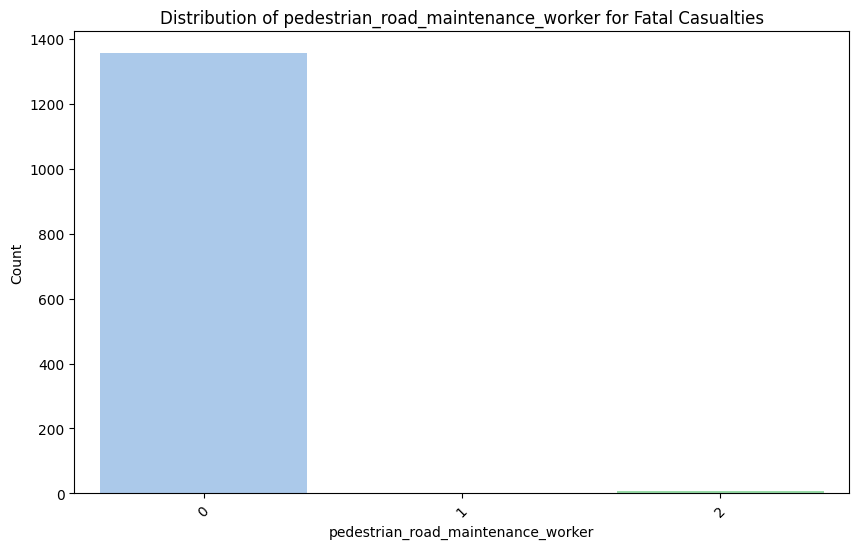

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2917885022.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='pastel')


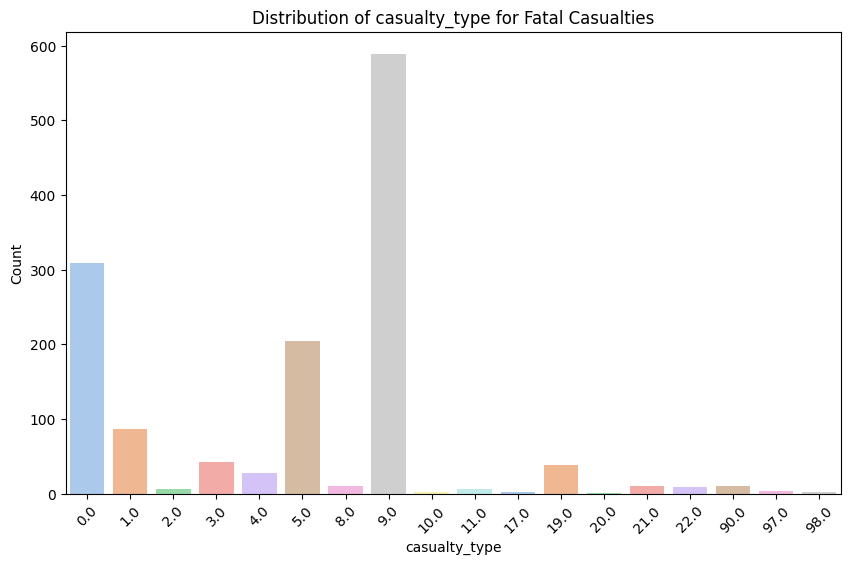

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2917885022.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='pastel')


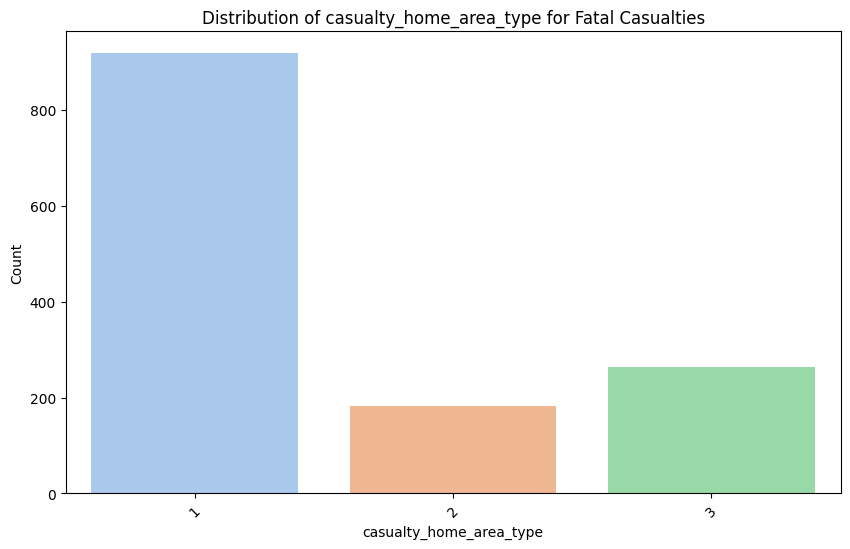

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2917885022.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='pastel')


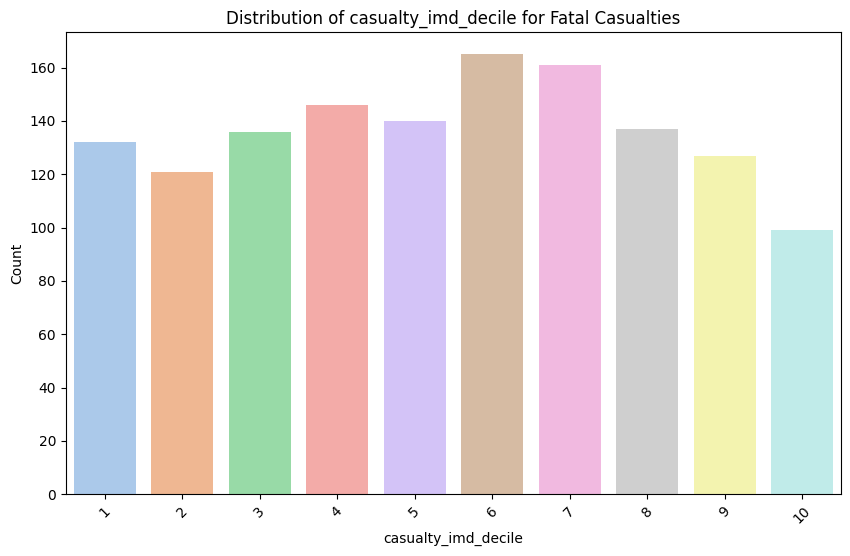

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2917885022.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='pastel')


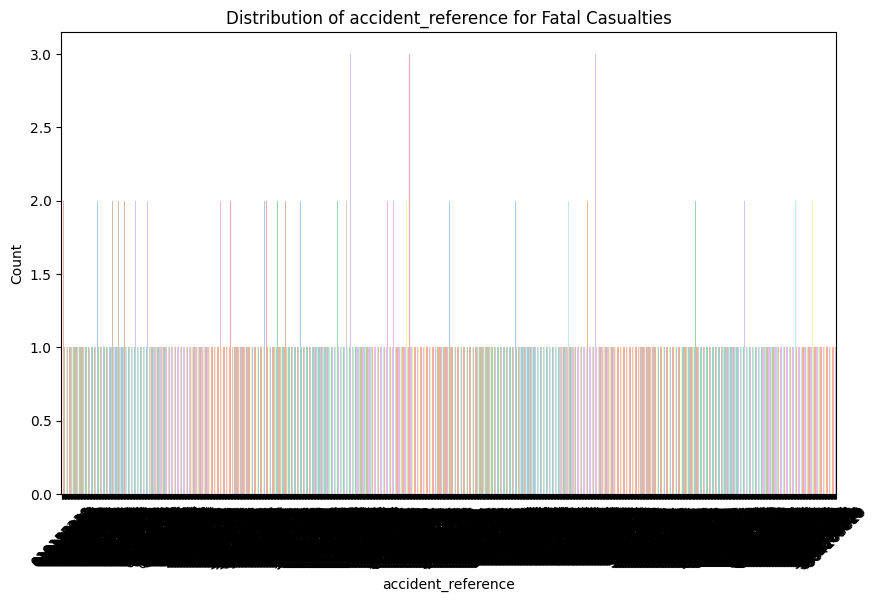

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2917885022.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='pastel')


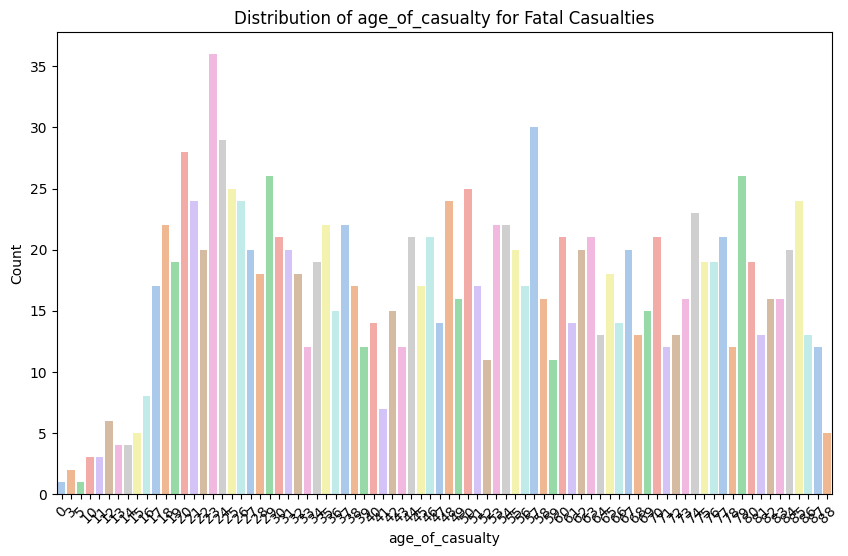

In [9]:
df1 = final_data[final_data['casualty_severity'] == 1]

# Visualizing the distribution of categorical features for fatal casualties
for feature in df1.columns:
    if feature != 'casualty_severity':
        plt.figure(figsize=(10, 6))
        sns.countplot(x=feature, data=df1, palette='pastel')
        plt.title(f'Distribution of {feature} for Fatal Casualties')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2548191815.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex_of_casualty', data=df1, palette='Set1')


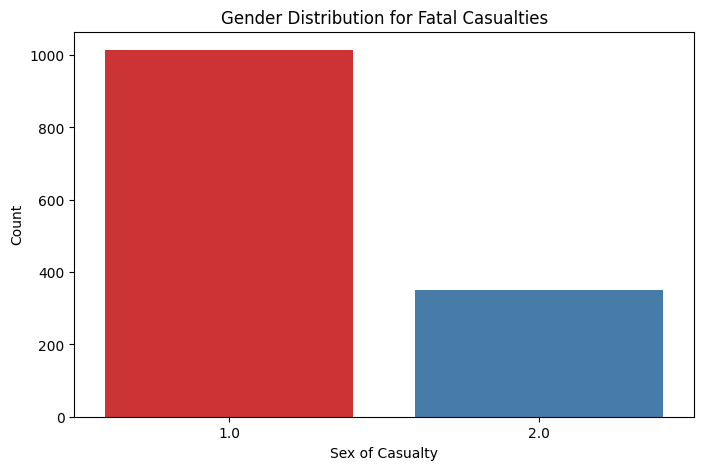

In [10]:
# Gender distribution for Fatal Casualties
plt.figure(figsize=(8, 5))
sns.countplot(x='sex_of_casualty', data=df1, palette='Set1')
plt.title('Gender Distribution for Fatal Casualties')
plt.xlabel('Sex of Casualty')
plt.ylabel('Count')
plt.show()

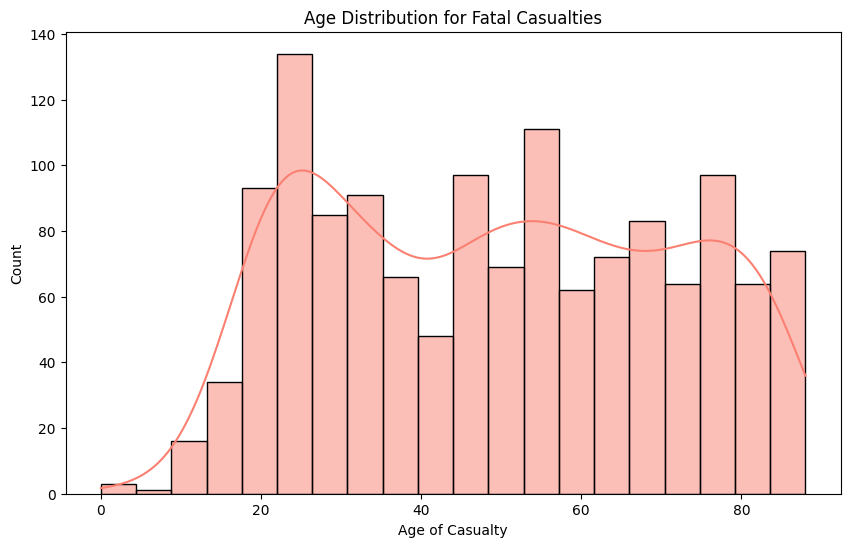

In [11]:
# Age distribution for Fatal Casualties
plt.figure(figsize=(10, 6))
sns.histplot(x='age_of_casualty', data=df1, bins=20, kde=True, color='salmon')
plt.title('Age Distribution for Fatal Casualties')
plt.xlabel('Age of Casualty')
plt.ylabel('Count')
plt.show()

# EDA for Type 2 (Serious) Casualties

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2694341382.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df2, palette='deep')


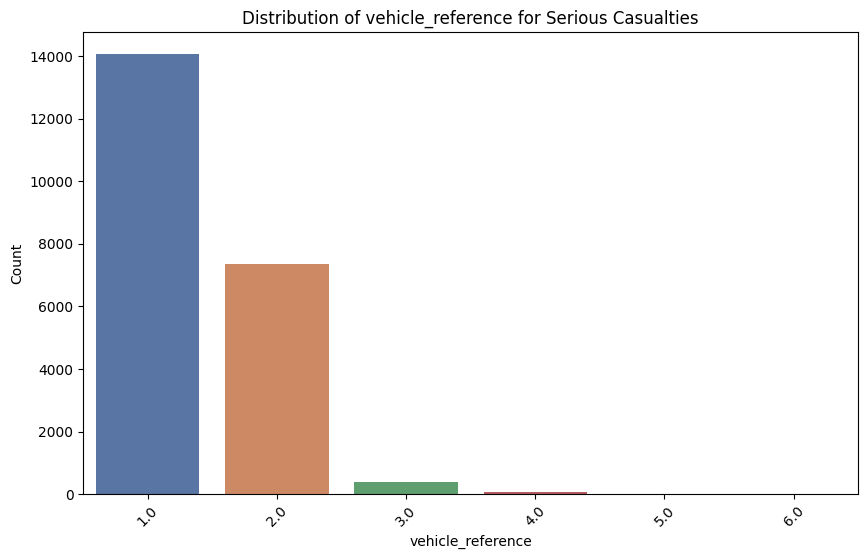

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2694341382.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df2, palette='deep')


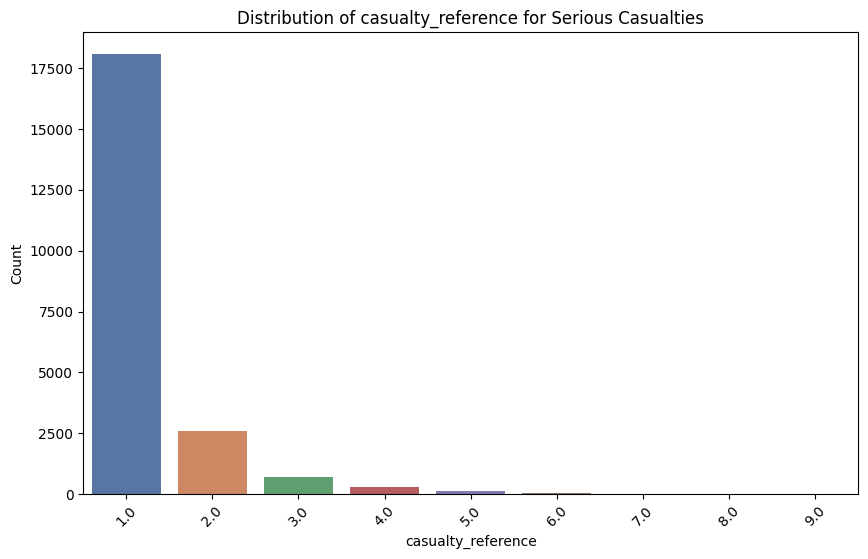

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2694341382.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df2, palette='deep')


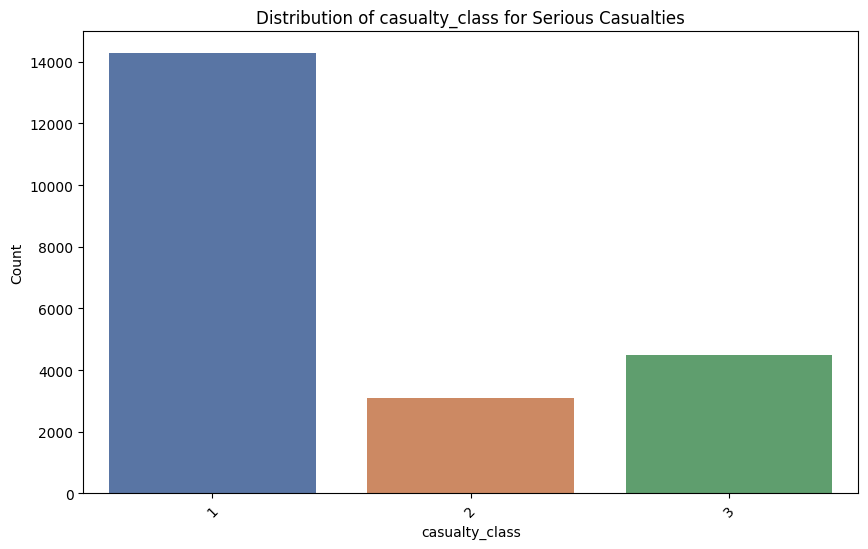

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2694341382.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df2, palette='deep')


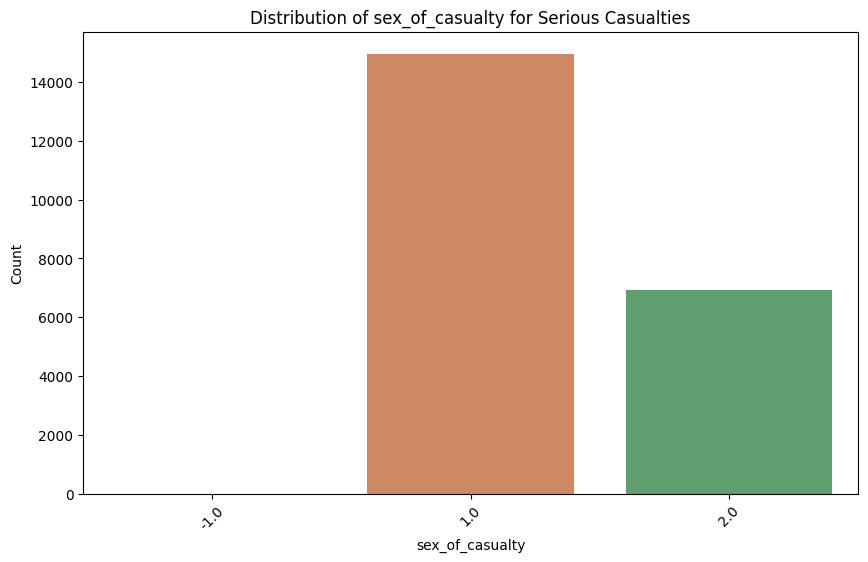

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2694341382.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df2, palette='deep')


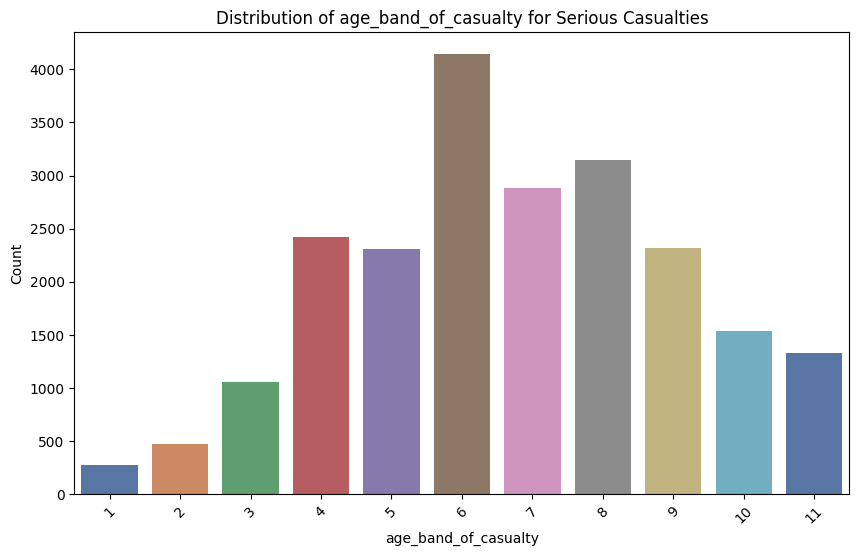

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2694341382.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df2, palette='deep')


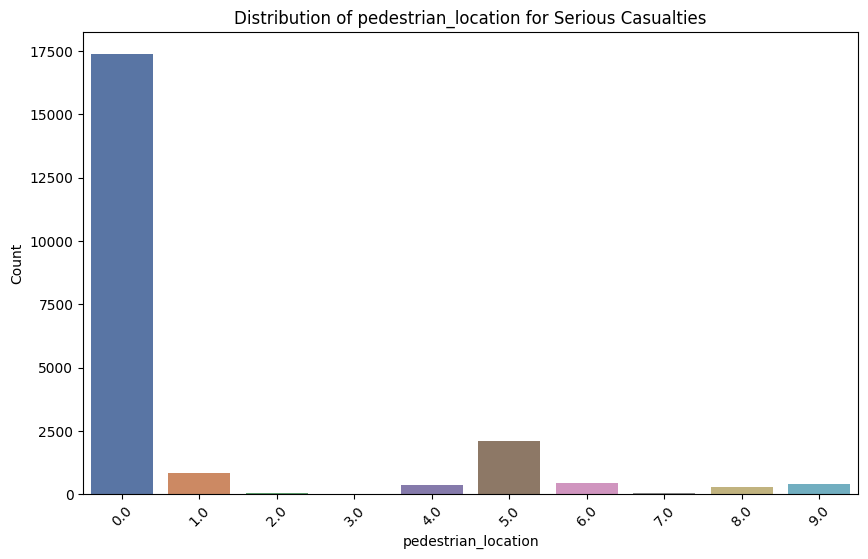

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2694341382.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df2, palette='deep')


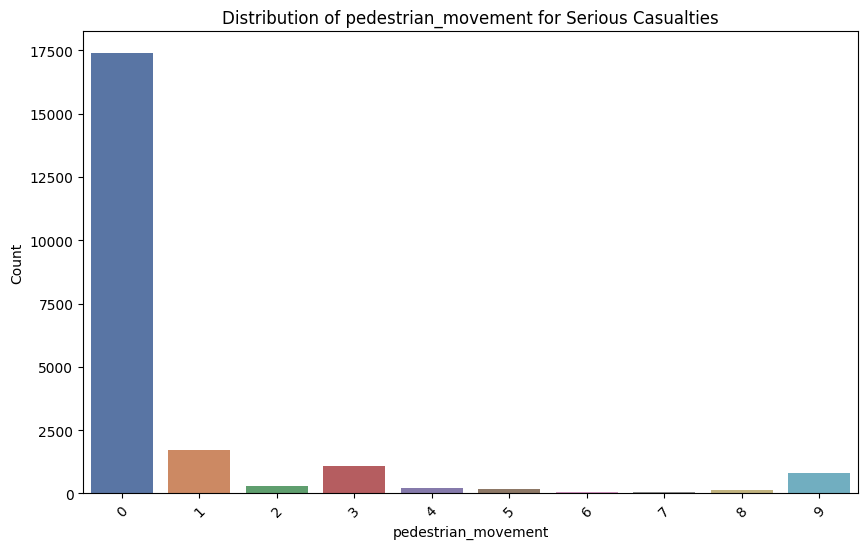

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2694341382.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df2, palette='deep')


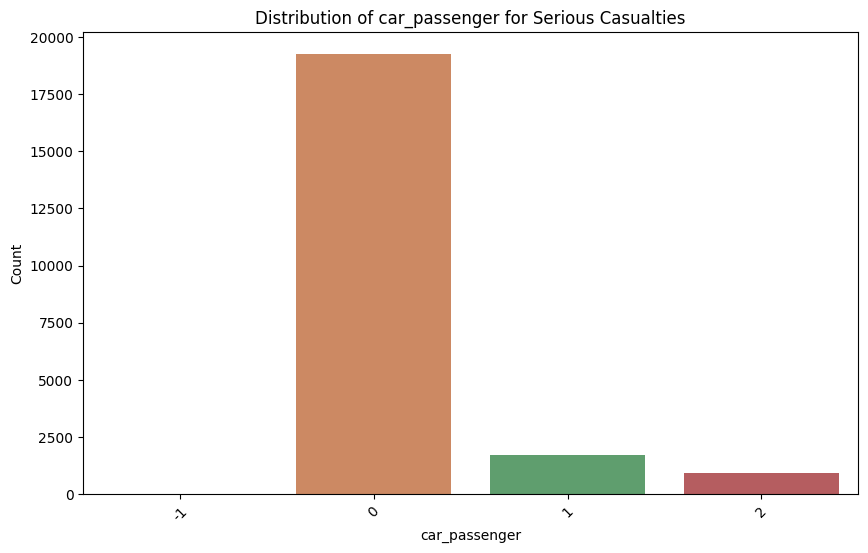

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2694341382.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df2, palette='deep')


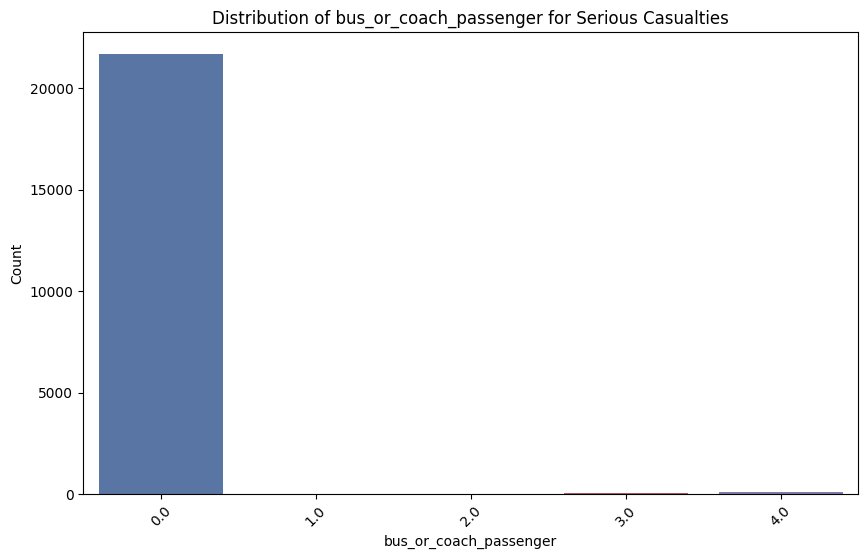

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2694341382.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df2, palette='deep')


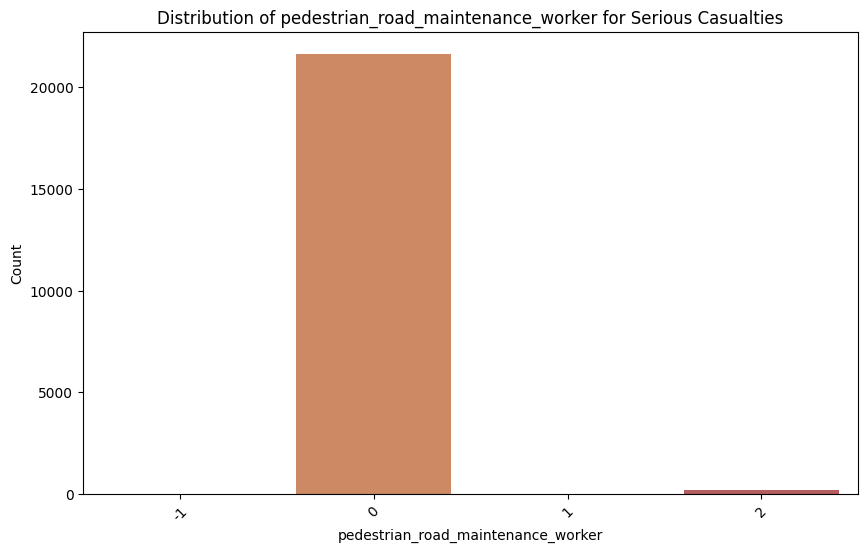

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2694341382.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df2, palette='deep')


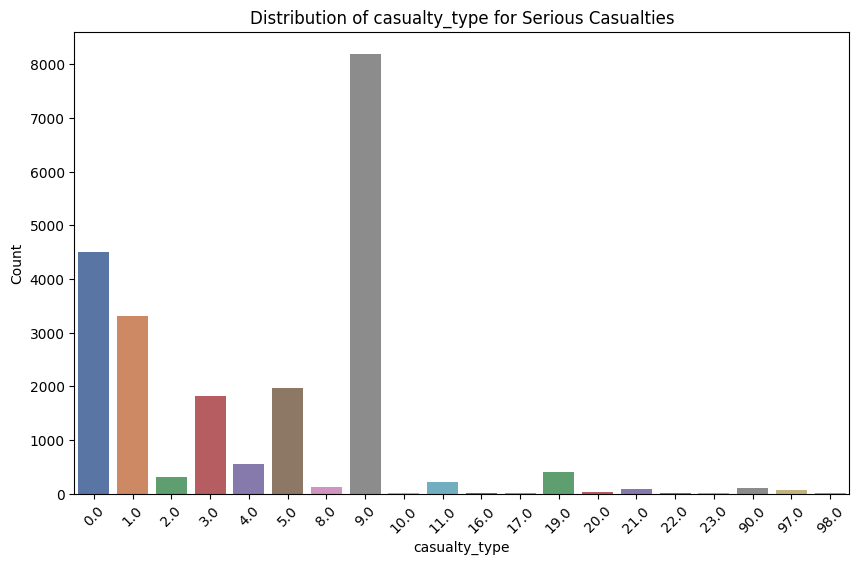

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2694341382.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df2, palette='deep')


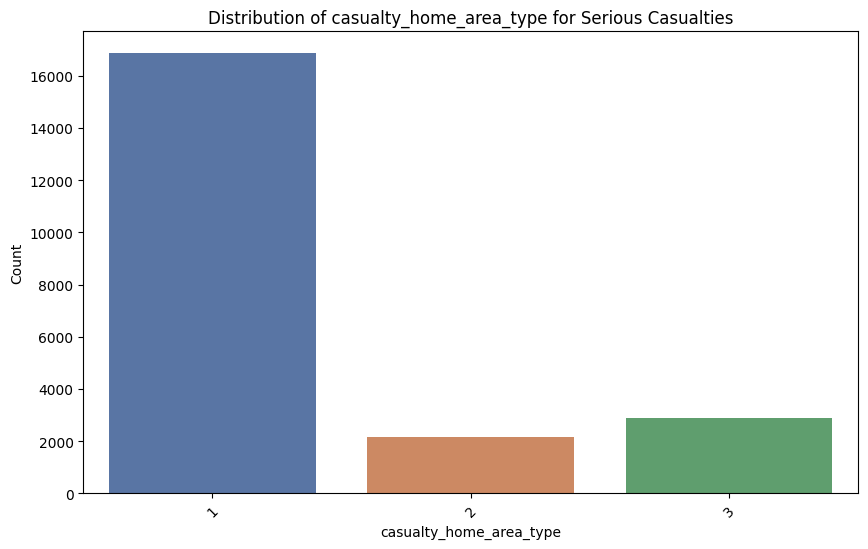

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2694341382.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df2, palette='deep')


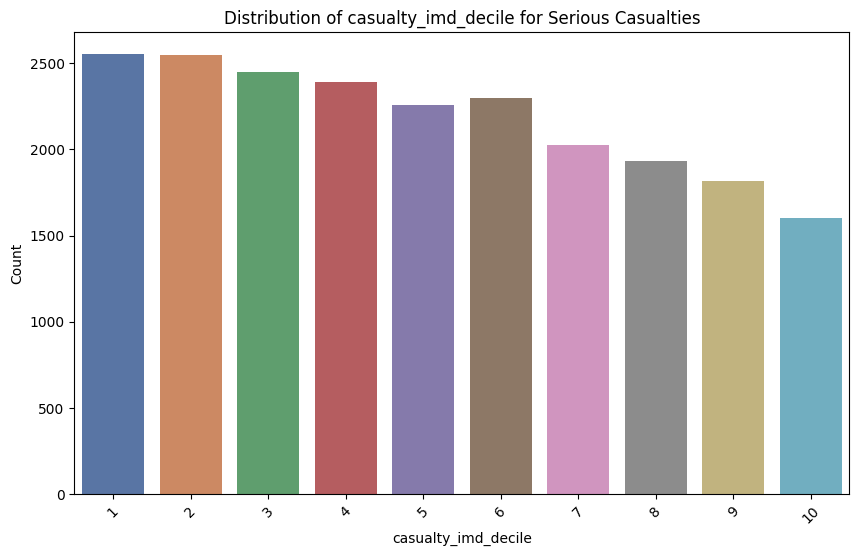

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2694341382.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df2, palette='deep')


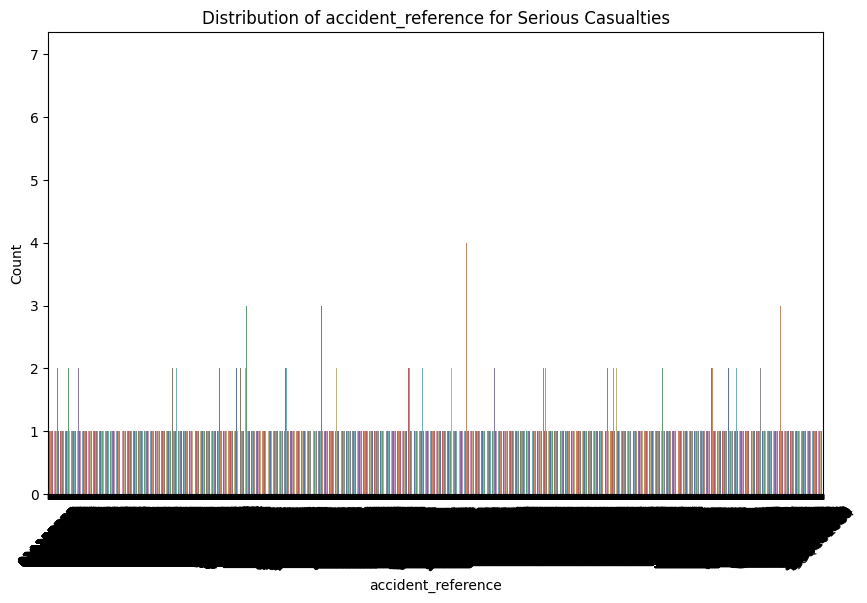

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\2694341382.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df2, palette='deep')


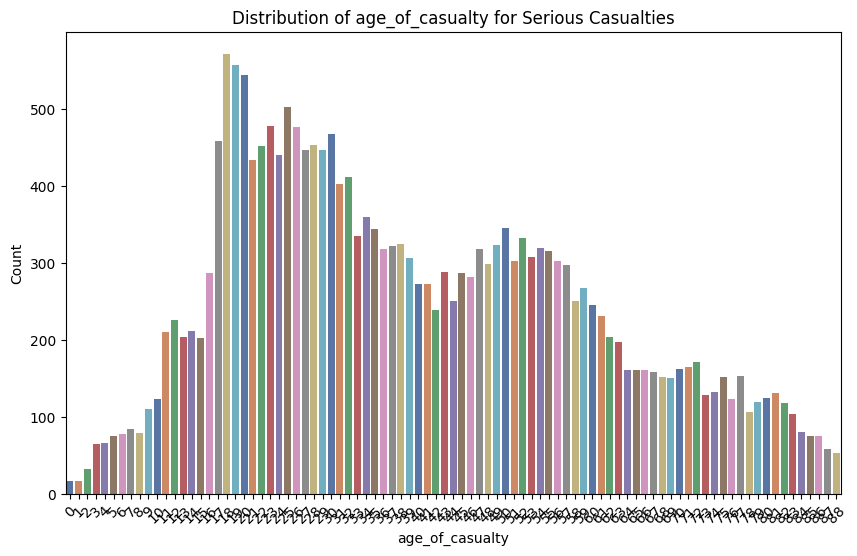

In [18]:
df2 = final_data[final_data['casualty_severity'] == 2]

# Visualizing the distribution of categorical features for serious casualties
for feature in df2.columns:
    if feature != 'casualty_severity':
        plt.figure(figsize=(10, 6))
        sns.countplot(x=feature, data=df2, palette='deep')
        plt.title(f'Distribution of {feature} for Serious Casualties')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\1060292249.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex_of_casualty', data=df2, palette='Set2')


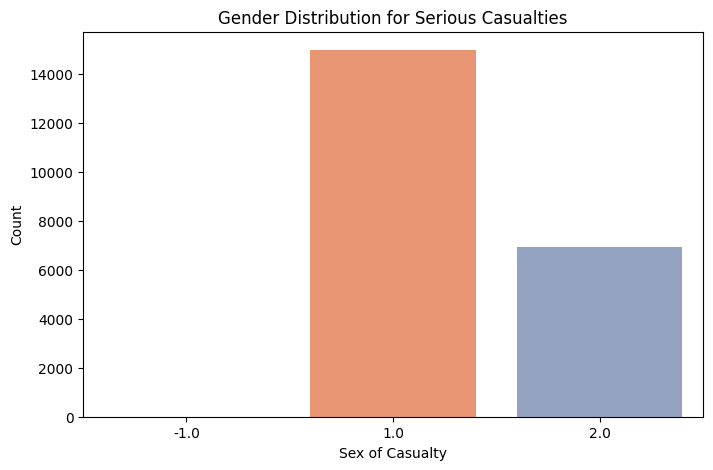

In [19]:
# Gender distribution for Serious Casualties
plt.figure(figsize=(8, 5))
sns.countplot(x='sex_of_casualty', data=df2, palette='Set2')
plt.title('Gender Distribution for Serious Casualties')
plt.xlabel('Sex of Casualty')
plt.ylabel('Count')
plt.show()

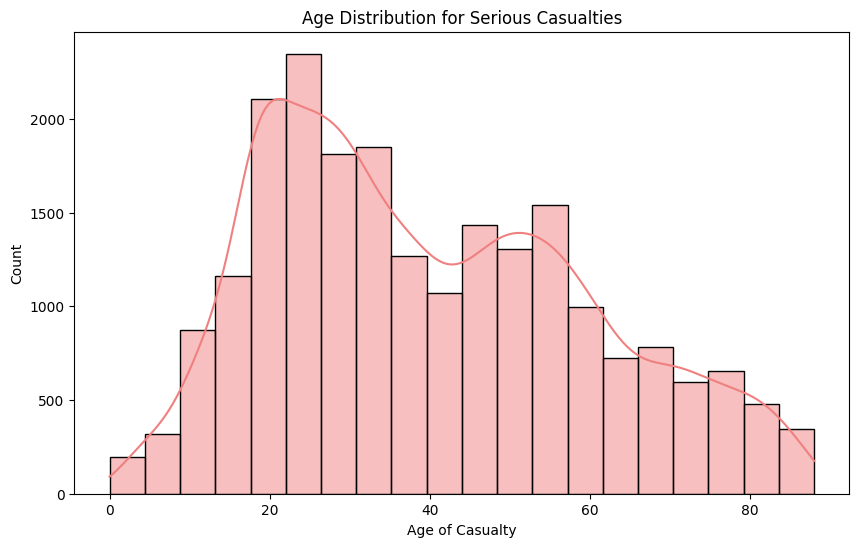

In [20]:
# Age distribution for Serious Casualties
plt.figure(figsize=(10, 6))
sns.histplot(x='age_of_casualty', data=df2, bins=20, kde=True, color='lightcoral')
plt.title('Age Distribution for Serious Casualties')
plt.xlabel('Age of Casualty')
plt.ylabel('Count')
plt.show()

# EDA for Type 3 (Slight) Casualties

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\173963540.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df3, palette='muted')


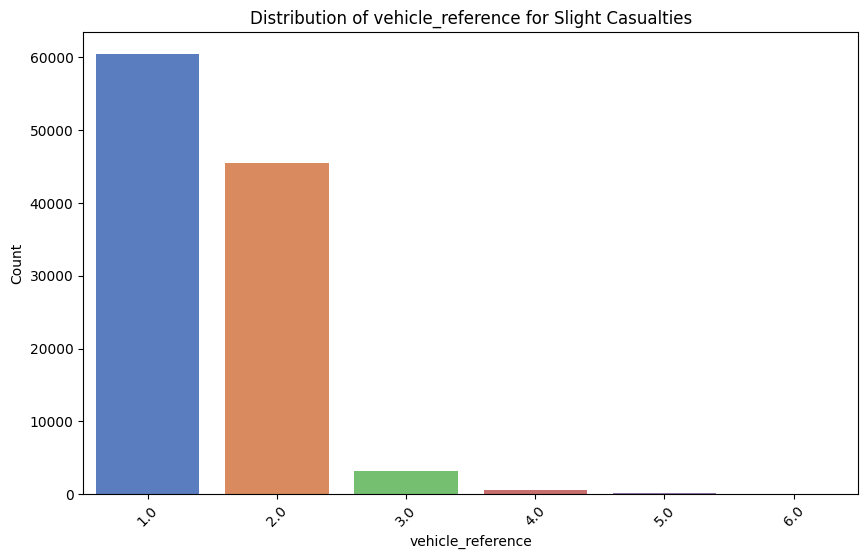

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\173963540.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df3, palette='muted')


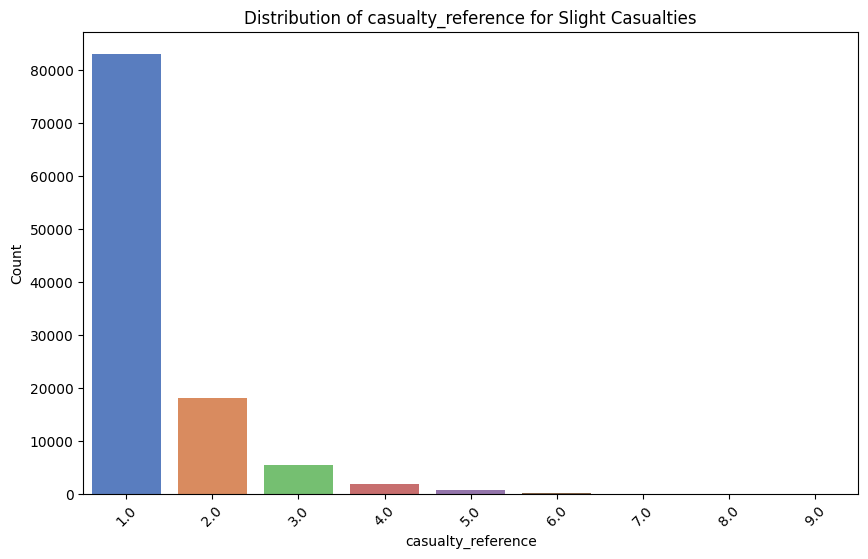

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\173963540.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df3, palette='muted')


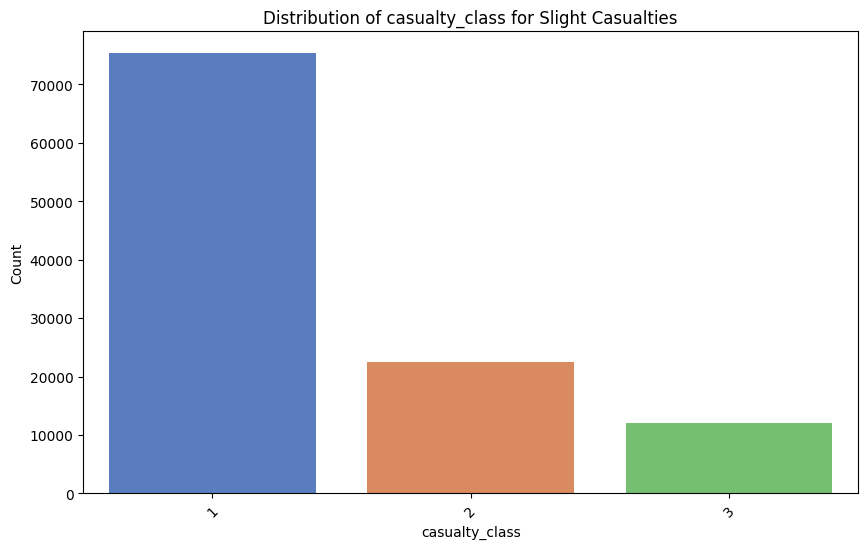

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\173963540.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df3, palette='muted')


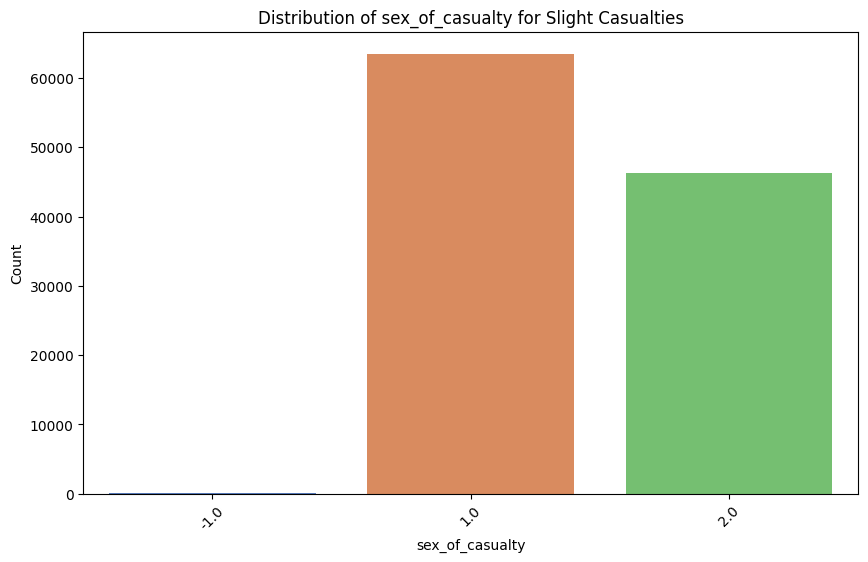

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\173963540.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df3, palette='muted')


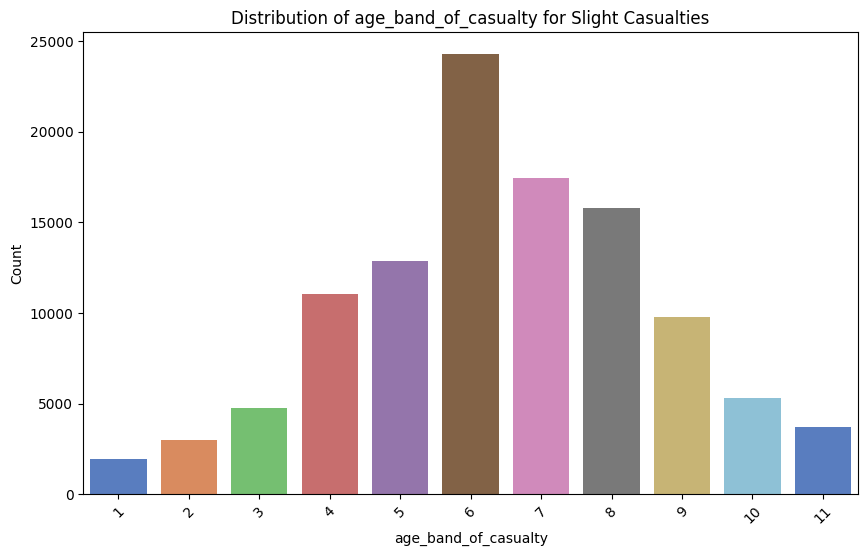

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\173963540.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df3, palette='muted')


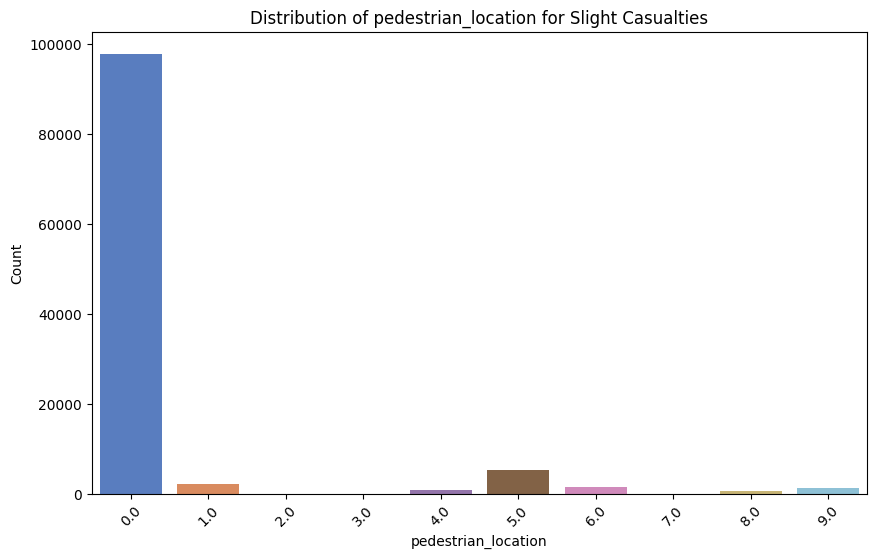

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\173963540.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df3, palette='muted')


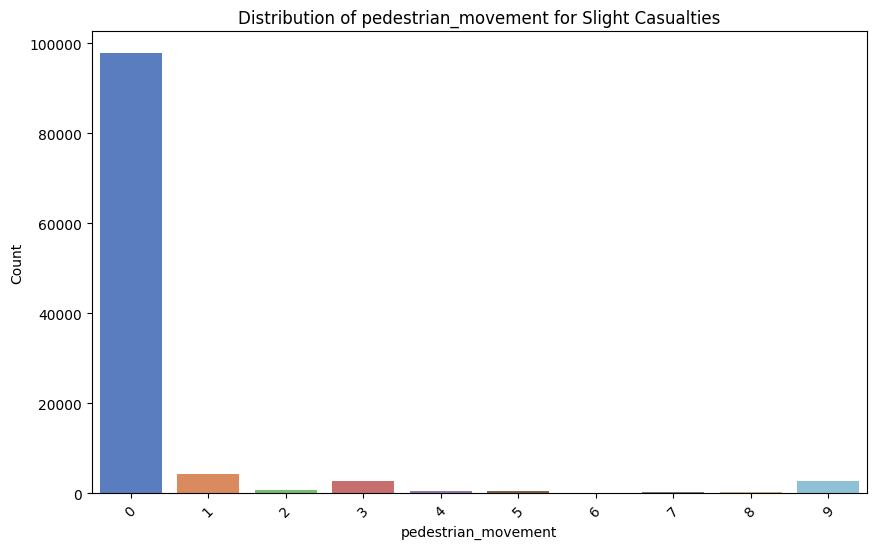

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\173963540.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df3, palette='muted')


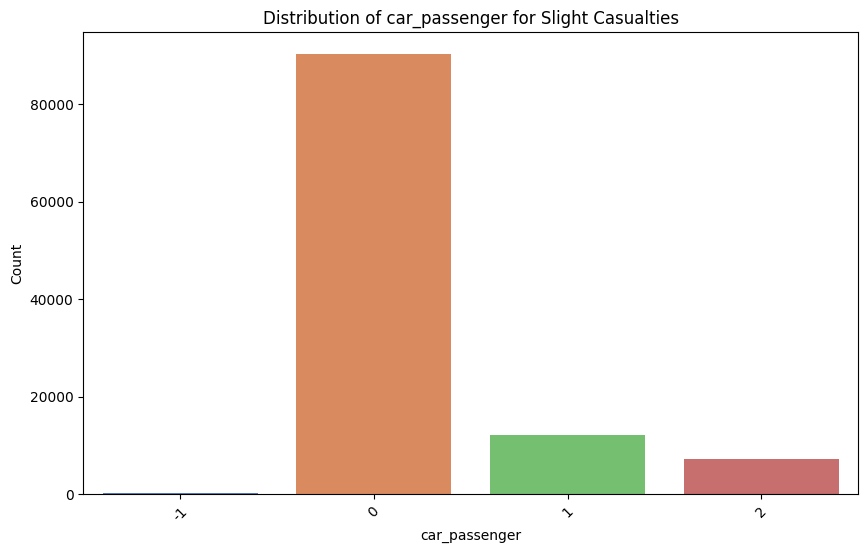

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\173963540.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df3, palette='muted')


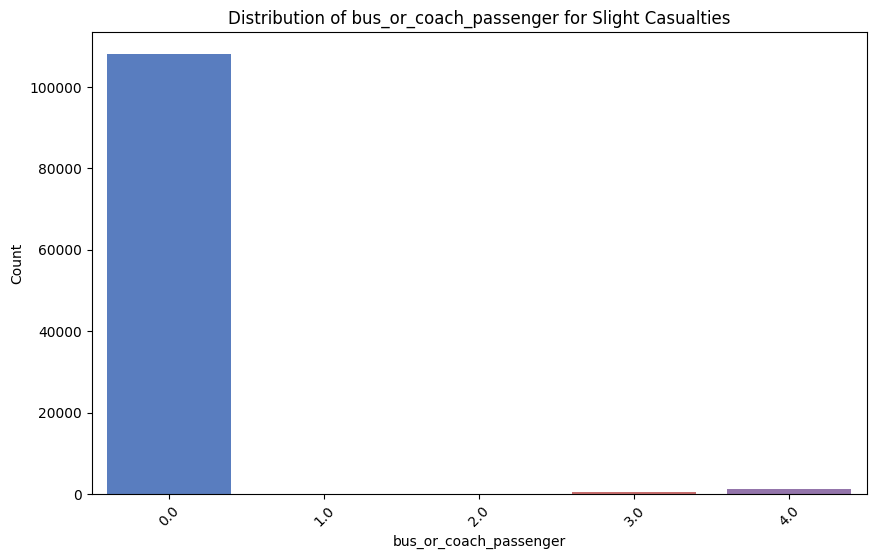

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\173963540.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df3, palette='muted')


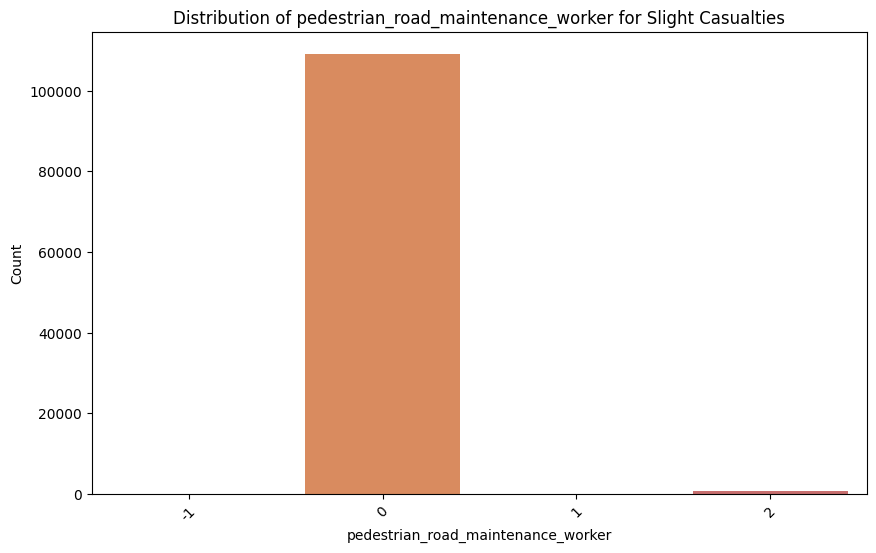

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\173963540.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df3, palette='muted')


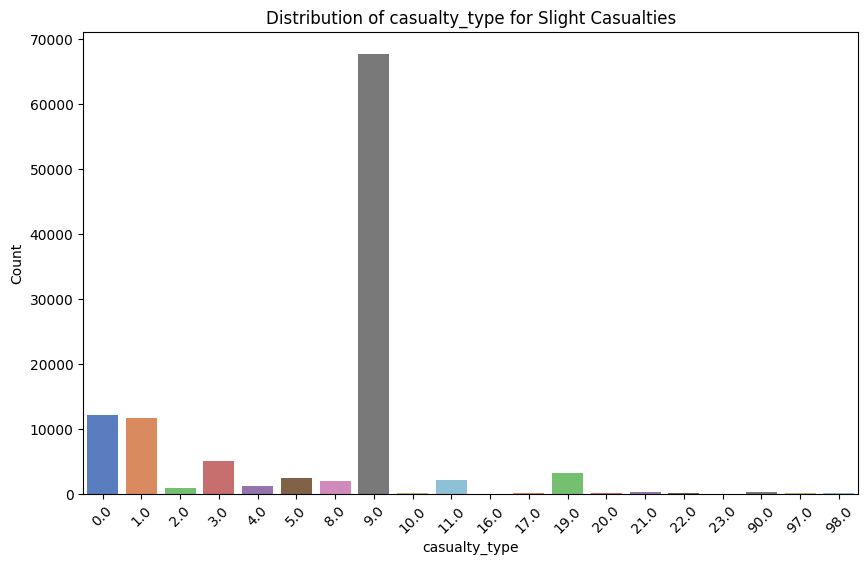

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\173963540.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df3, palette='muted')


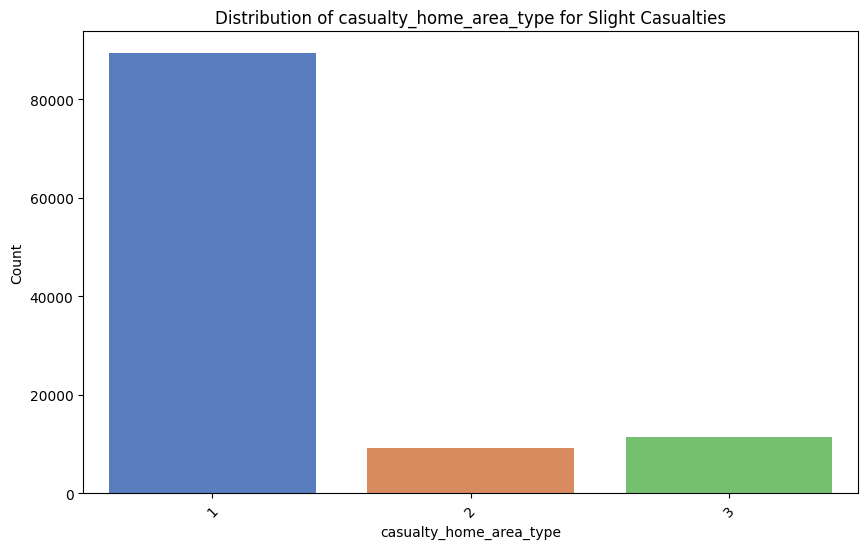

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\173963540.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df3, palette='muted')


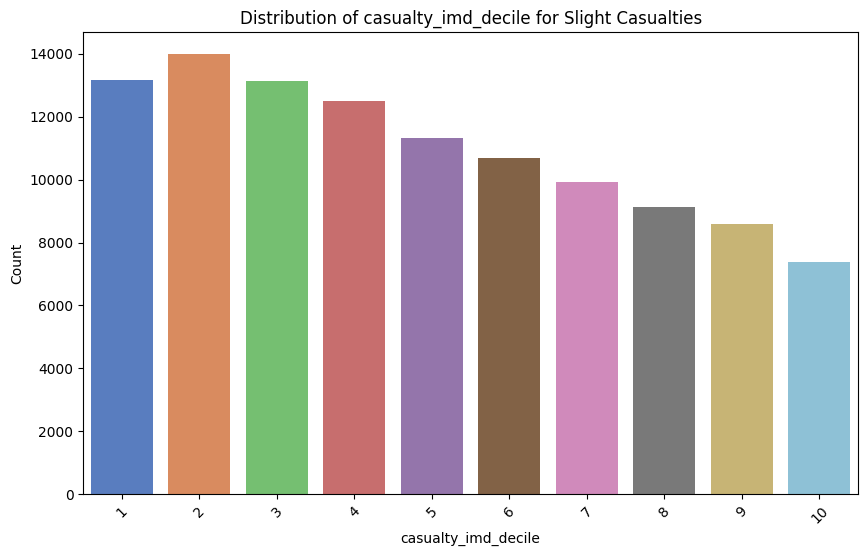

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\173963540.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df3, palette='muted')


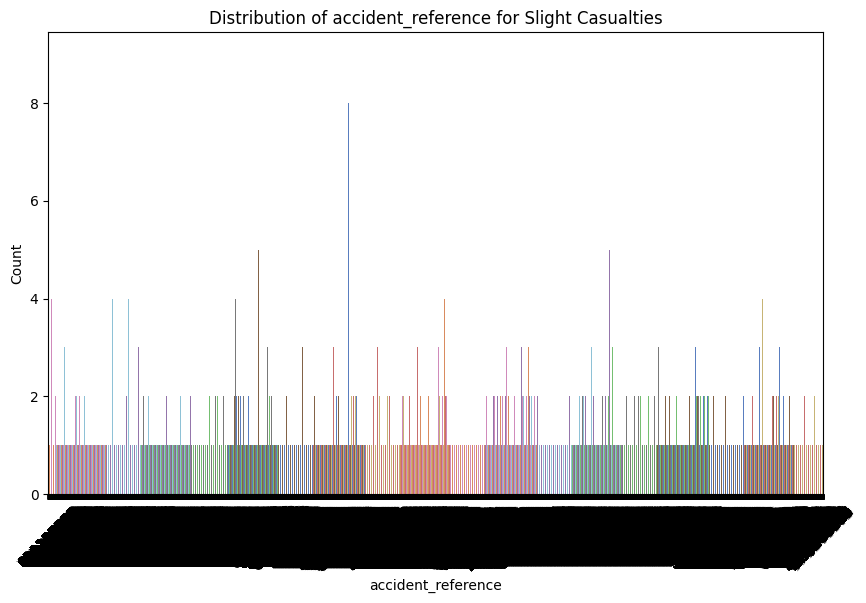

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\173963540.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df3, palette='muted')


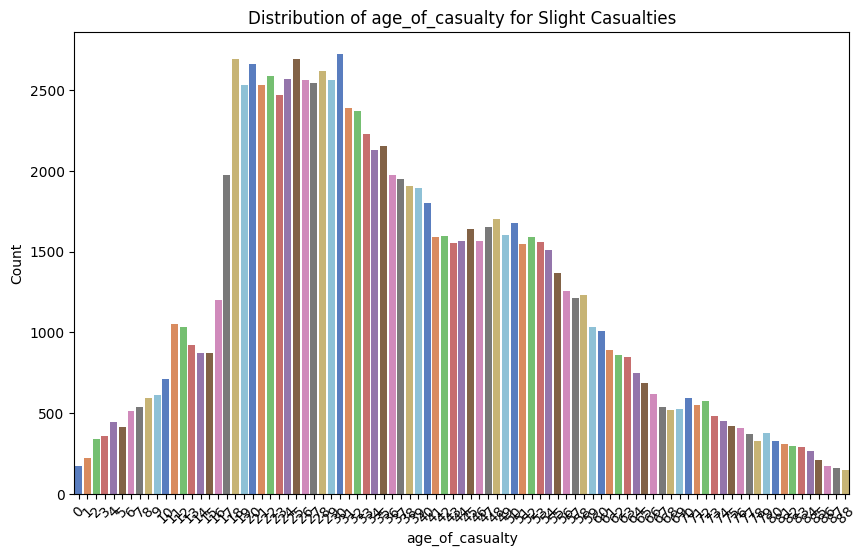

In [21]:
df3 = final_data[final_data['casualty_severity'] == 3]

# Visualizing the distribution of categorical features for slight casualties
for feature in df3.columns:
    if feature != 'casualty_severity':
        plt.figure(figsize=(10, 6))
        sns.countplot(x=feature, data=df3, palette='muted')
        plt.title(f'Distribution of {feature} for Slight Casualties')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

C:\Users\Parth Tripathi\AppData\Local\Temp\ipykernel_16080\1242901740.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex_of_casualty', data=df3, palette='Set3')


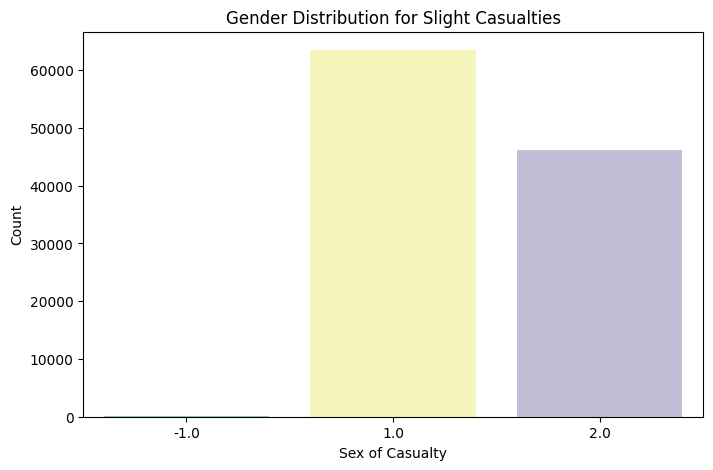

In [22]:
# Gender distribution for Slight Casualties
plt.figure(figsize=(8, 5))
sns.countplot(x='sex_of_casualty', data=df3, palette='Set3')
plt.title('Gender Distribution for Slight Casualties')
plt.xlabel('Sex of Casualty')
plt.ylabel('Count')
plt.show()

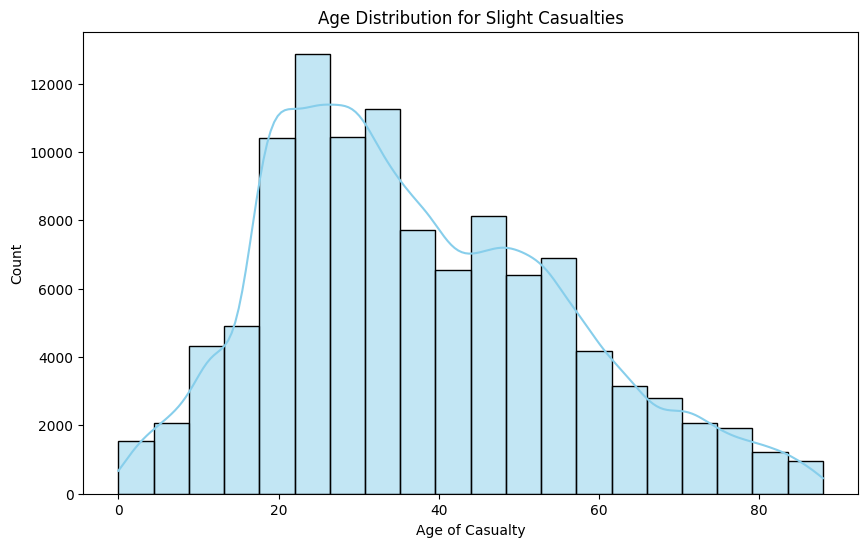

In [23]:

# Age distribution for Slight Casualties
plt.figure(figsize=(10, 6))
sns.histplot(x='age_of_casualty', data=df3, bins=20, kde=True, color='skyblue')
plt.title('Age Distribution for Slight Casualties')
plt.xlabel('Age of Casualty')
plt.ylabel('Count')
plt.show()

In [ ]:
# Save the final cleaned and processed dataframe for further analysis
final_data.to_csv('cleaned_casualty_data.csv', index=False)

In [26]:
# General Observations:

# Age Distribution:

# Most casualties fall within the age group of 26-35, followed by other adult age groups.
# The age distribution may have outliers, but they have been handled by removing extreme values.
# Gender Distribution:

# Male casualties outnumber female casualties across all severity levels.
# The ratio of male to female casualties is higher in severe cases.
# Casualty Severity:

# Most casualties are of slight severity, followed by serious and fatal casualties.
# The dataset contains a mix of severity levels, with slight casualties dominating.
# Casualty Types:

# Car occupants are the most common casualties, followed by pedestrians and cyclists.
# Passengers and drivers/riders contribute significantly to the casualty count.

# Correlation Analysis:

# The correlation heatmap helps identify relationships between numerical variables.
# Positive or negative correlations can provide insights into potential patterns or dependencies.
# Specific Observations (From Plots):
# Fatal Casualties:

# Drivers or riders are most involved in fatal accidents.
# Age group 26-35 is prominent in fatal accidents.
# Males account for a higher percentage of fatal casualties.

# Impact of light conditions on fatal casualties.
# Serious Casualties:

# Drivers are still most involved in serious accidents.
# Age group 26-35 dominates serious casualties.
# Males have a higher representation in serious casualties.
# Impact of light conditions on serious casualties.
# Slight Casualties:

# Passengers have a higher representation in slight accidents.
# Age group 26-35 has a significant presence in slight casualties.
# Males still outnumber females in slight casualties.
# Impact of light conditions on slight casualties. 